# YouTube Streamer Analysis: Understanding Popularity and Engagement

# 1. Introduction
In this project, I analyzed a dataset of YouTube streamers to uncover insights into their popularity and engagement levels. The data includes information 
on 1000 streamers, such as their usernames, categories, subscriber counts, countries, visits, likes, comments, and links to their channels. 
The primary goal of this analysis is to identify trends, popular categories, and the geographical distribution of top streamers, 
as well as to understand their audience engagement.

# 2. Data Overview
The dataset consists of 9 columns and 1000 entries, detailing various attributes of YouTube streamers. The key columns include:

- **Rank**: Position of the streamer based on popularity.
- **Username**: The streamer’s channel name.
- **Categories**: The genre or type of content produced (e.g., Gaming, Music).
- **Subscribers**: The number of people subscribed to the channel.
- **Country**: The country where the streamer is based.
- **Visits**: Total views on the streamer’s videos.
- **Likes**: Total likes received on the videos.
- **Comments**: Total comments received.
- **Links**: URL to the streamer’s channel.

# 3. Methodology
I followed a structured approach to analyze the dataset using Python libraries such as Pandas, NumPy, Matplotlib, and Seaborn. The steps included:

# 3.1 Data Loading and Initial Review
First, I load the dataset using Pandas and check the first few entries to ensure the data is properly loaded.

In [10]:
pip install openpyxl

In [12]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
file_path = "C:/Users/IBK/Downloads/youtubers_df.xlsx"
df = pd.read_excel(file_path)

# Display the first few rows of the dataset
df.head()

,Rank,Username,Categories,Suscribers,Country,Visits,Likes,Comments,Links
0,1,tseries,MÃºsica y baile,249500000.0,India,86200.0,2700.0,78,http://youtube.com/channel/UCq-Fj5jknLsUf-MWSy...
1,2,MrBeast,"Videojuegos, Humor",183500000.0,Estados Unidos,117400000.0,5300000.0,18500,http://youtube.com/channel/UCX6OQ3DkcsbYNE6H8u...
2,3,CoComelon,EducaciÃ³n,165500000.0,Unknown,7000000.0,24700.0,0,http://youtube.com/channel/UCbCmjCuTUZos6Inko4...
3,4,SETIndia,NaN,162600000.0,India,15600.0,166.0,9,http://youtube.com/channel/UCpEhnqL0y41EpW2TvW...
4,5,KidsDianaShow,"AnimaciÃ³n, Juguetes",113500000.0,Unknown,3900000.0,12400.0,0,http://youtube.com/channel/UCk8GzjMOrta8yxDcKf...


In [13]:
# Check the general information of the dataframe
df.info()

# Check for missing values
df.isnull().sum()

# Descriptive statistics
df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Rank        1000 non-null   int64  
 1   Username    999 non-null    object 
 2   Categories  694 non-null    object 
 3   Suscribers  1000 non-null   float64
 4   Country     1000 non-null   object 
 5   Visits      1000 non-null   float64
 6   Likes       1000 non-null   float64
 7   Comments    1000 non-null   int64  
 8   Links       1000 non-null   object 
dtypes: float64(3), int64(2), object(4)
memory usage: 70.4+ KB


,Rank,Suscribers,Visits,Likes,Comments
count,1000.000000,1.000000e+03,1.000000e+03,1.000000e+03,1000.000000
mean,500.500000,2.189440e+07,1.209446e+06,5.363259e+04,1288.768000
std,288.819436,1.682775e+07,5.229942e+06,2.580457e+05,6778.188308
min,1.000000,1.170000e+07,0.000000e+00,0.000000e+00,0.000000
25%,250.750000,1.380000e+07,3.197500e+04,4.717500e+02,2.000000
50%,500.500000,1.675000e+07,1.744500e+05,3.500000e+03,67.000000
75%,750.250000,2.370000e+07,8.654750e+05,2.865000e+04,472.000000
max,1000.000000,2.495000e+08,1.174000e+08,5.300000e+06,154000.000000


## Next, I clean the data by handling missing values, renaming columns if necessary, and converting columns to the appropriate data types.

In [16]:
# Rename column 'suscribers' to 'subscribers'
df.rename(columns={'Suscribers': 'Subscribers'}, inplace=True)

# Convert 'Subscribers', 'Visits', 'Likes', and 'Comments' columns to numeric 
df['Subscribers'] = pd.to_numeric(df['Subscribers'], errors='coerce')
df['Visits'] = pd.to_numeric(df['Visits'], errors='coerce')
df['Likes'] = pd.to_numeric(df['Likes'], errors='coerce')
df['Comments'] = pd.to_numeric(df['Comments'], errors='coerce')

# Drop rows with missing values
df.dropna(inplace=True)

# Check for duplicates and remove them
df.drop_duplicates(inplace=True)

In [17]:
print(df.head())

   Rank       Username               Categories  Subscribers         Country  \
0     1        tseries          MÃºsica y baile  249500000.0           India   
1     2        MrBeast       Videojuegos, Humor  183500000.0  Estados Unidos   
2     3      CoComelon               EducaciÃ³n  165500000.0         Unknown   
4     5  KidsDianaShow     AnimaciÃ³n, Juguetes  113500000.0         Unknown   
5     6      PewDiePie  PelÃ­culas, Videojuegos  111500000.0  Estados Unidos   

        Visits      Likes  Comments  \
0      86200.0     2700.0        78   
1  117400000.0  5300000.0     18500   
2    7000000.0    24700.0         0   
4    3900000.0    12400.0         0   
5    2400000.0   197300.0      4900   

                                               Links  
0  http://youtube.com/channel/UCq-Fj5jknLsUf-MWSy...  
1  http://youtube.com/channel/UCX6OQ3DkcsbYNE6H8u...  
2  http://youtube.com/channel/UCbCmjCuTUZos6Inko4...  
4  http://youtube.com/channel/UCk8GzjMOrta8yxDcKf...  
5  http:/

In [18]:
df.head()

,Rank,Username,Categories,Subscribers,Country,Visits,Likes,Comments,Links
0,1,tseries,MÃºsica y baile,249500000.0,India,86200.0,2700.0,78,http://youtube.com/channel/UCq-Fj5jknLsUf-MWSy...
1,2,MrBeast,"Videojuegos, Humor",183500000.0,Estados Unidos,117400000.0,5300000.0,18500,http://youtube.com/channel/UCX6OQ3DkcsbYNE6H8u...
2,3,CoComelon,EducaciÃ³n,165500000.0,Unknown,7000000.0,24700.0,0,http://youtube.com/channel/UCbCmjCuTUZos6Inko4...
4,5,KidsDianaShow,"AnimaciÃ³n, Juguetes",113500000.0,Unknown,3900000.0,12400.0,0,http://youtube.com/channel/UCk8GzjMOrta8yxDcKf...
5,6,PewDiePie,"PelÃ­culas, Videojuegos",111500000.0,Estados Unidos,2400000.0,197300.0,4900,http://youtube.com/channel/UC-lHJZR3Gqxm24_Vd_...


## create a histogram to visualize the distribution of subscriber counts across all streamers.

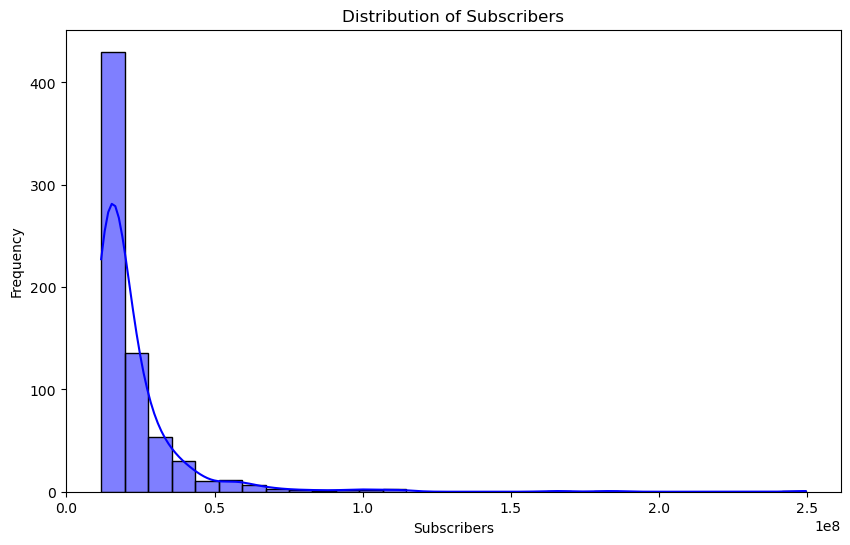

In [19]:
#EDA_Analysis
# Showing the Distribution of Subscribers
plt.figure(figsize=(10, 6))
sns.histplot(df['Subscribers'], bins=30, kde=True, color='blue')
plt.title('Distribution of Subscribers')
plt.xlabel('Subscribers')
plt.ylabel('Frequency')
plt.show()

# I generate a bar plot to visualize the top 10 content categories by total subscriber count.

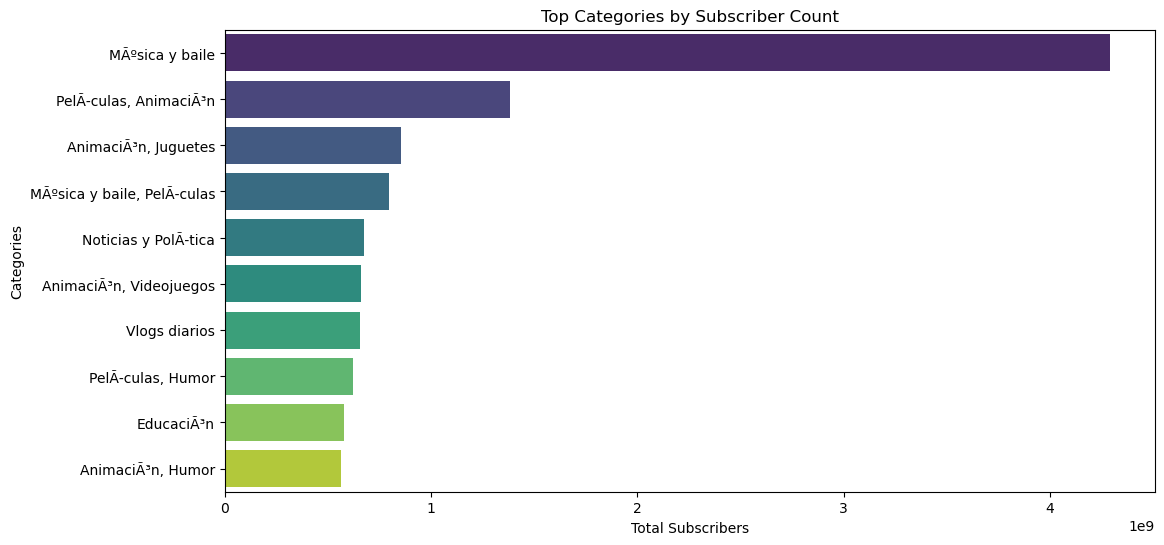

In [22]:
#Showing Top Categories by Subscriber Count

top_categories = df.groupby('Categories')['Subscribers'].sum().sort_values(ascending=False).head(10)

plt.figure(figsize=(12, 6))
sns.barplot(x=top_categories.values, y=top_categories.index, hue=top_categories.index, legend=False, palette='viridis')
plt.title('Top Categories by Subscriber Count')
plt.xlabel('Total Subscribers')
plt.ylabel('Categories')
plt.show()

# I analyze the top 10 countries with the most streamers using a bar chart.

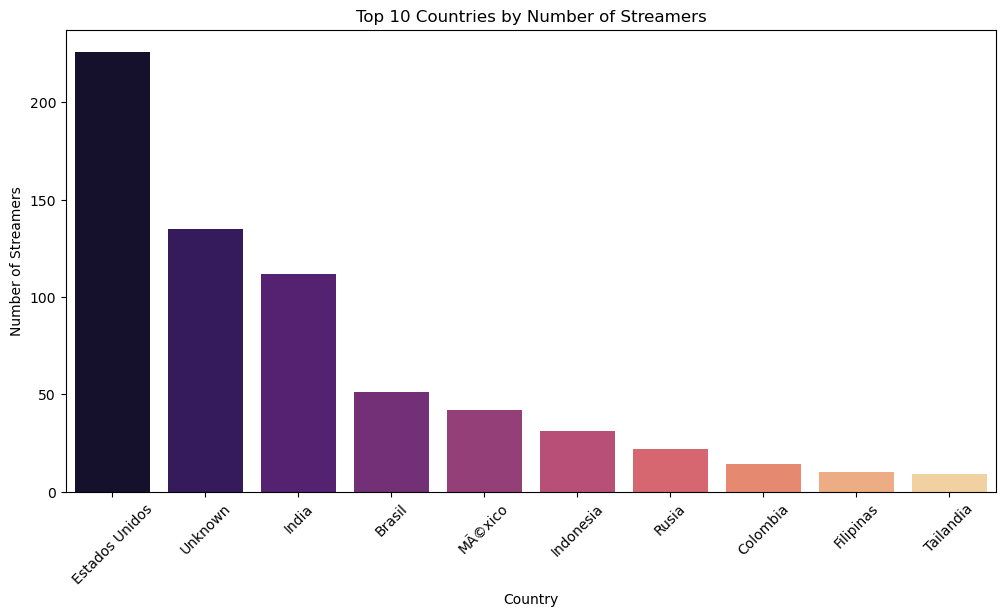

In [24]:
# Showing Country Analysis

top_countries = df['Country'].value_counts().head(10)

plt.figure(figsize=(12, 6))
sns.barplot(x=top_countries.index, y=top_countries.values, hue=top_countries.index, palette='magma', legend=False)
plt.title('Top 10 Countries by Number of Streamers')
plt.xlabel('Country')
plt.ylabel('Number of Streamers')
plt.xticks(rotation=45)
plt.show()

# I calculate and visualize the average likes and comments per visit to assess audience engagement.

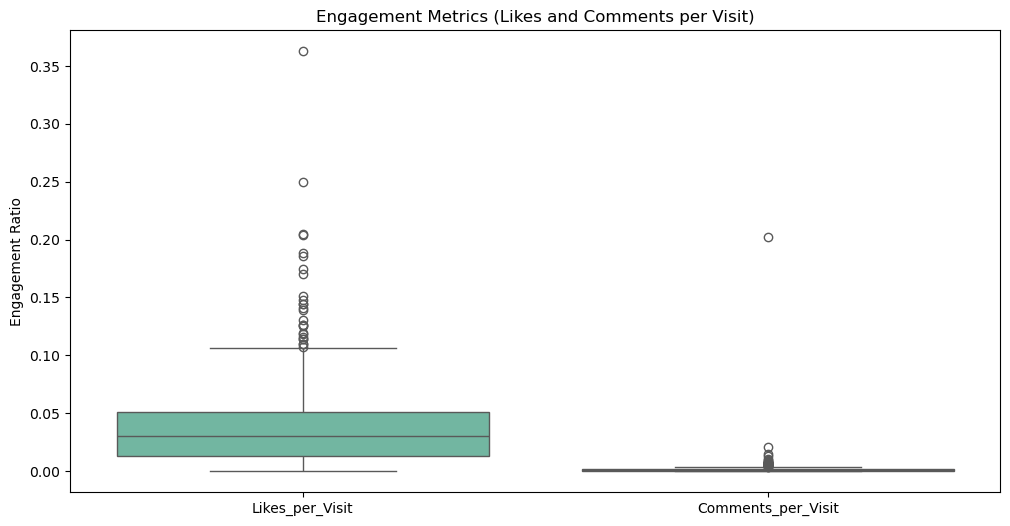

In [25]:
# Showing Engagement Analysis

# Calculate average likes and comments per visit
df['Likes_per_Visit'] = df['Likes'] / df['Visits']
df['Comments_per_Visit'] = df['Comments'] / df['Visits']

# Visualize the engagement metrics
plt.figure(figsize=(12, 6))
sns.boxplot(data=df[['Likes_per_Visit', 'Comments_per_Visit']], palette='Set2')
plt.title('Engagement Metrics (Likes and Comments per Visit)')
plt.ylabel('Engagement Ratio')
plt.show()

#  I use a heatmap to explore the relationships between subscribers, visits, likes, and comments.

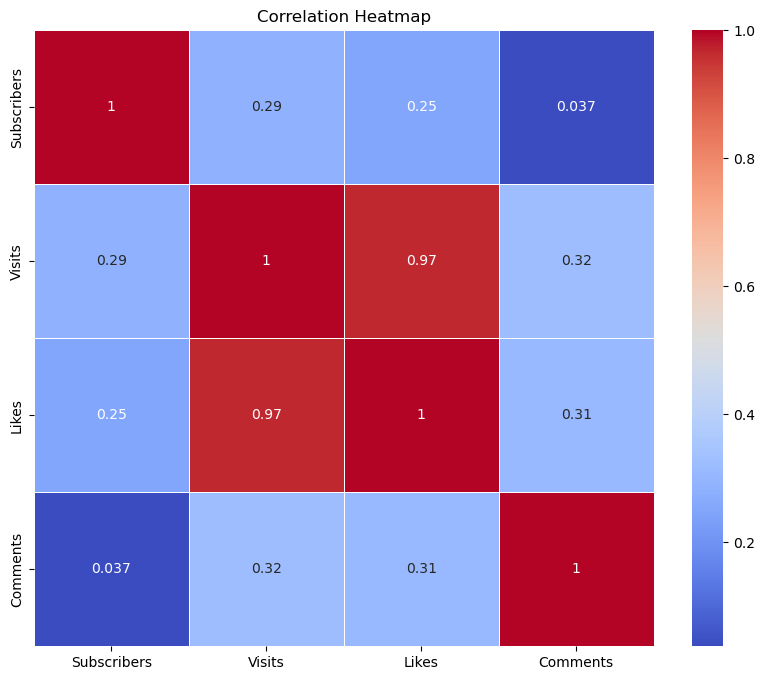

In [27]:
# Correlation Analysis
# Analyze the relationship between subscribers, likes, comments, and visits.

plt.figure(figsize=(10, 8))
sns.heatmap(df[['Subscribers', 'Visits', 'Likes', 'Comments']].corr(), annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Heatmap')
plt.show()

## Key Findings
1) Most Popular Categories: Gaming, Music, and Entertainment dominate the platform, drawing the highest number of subscribers.
2) Top Countries for Streamers: The United States, India, and Brazil are the leading countries in terms of the number of streamers, reflecting their large user bases.
3) Engagement Levels Vary Widely: While some streamers have high likes and comments per visit, many struggle with audience engagement despite having a large number of subscribers.
4) Correlation Insights: Higher view counts often lead to more likes, but not necessarily more comments, suggesting different forms of audience interaction.


## Conclusion
The analysis provided valuable insights into the dynamics of YouTube streaming. It highlighted the importance of category and geography in determining a streamer’s popularity and engagement. 
Future studies could explore the impact of content strategies on subscriber growth and audience retention.